# Model

As shown previously, when `Simulation.from_config()` is called, a `Radial1DModel` object is created. This is done via the class method `Radial1DModel.from_config()`. This model object contains important information about the shell structure, density, abundance, radiative temperature, and dilution factor throughout the supernova.

## Shell Structure

TARDIS models supernovae as expanding homologously. This means that at the beginning of the explosion, the
supernova starts at a single point and proceeds to expand radially outward such that the ratio of the velocity of
the ejecta to the distance from the ejecta to the supernova's center is uniform throughout the supernova. As an
example, if the outer edge of the ejecta moves outward at some velocity $v_\mathrm{outer\_boundary}$, the
velocity of the ejecta half way between the outer edge and the center would be
$\frac{v_\mathrm{outer\_boundary}}{2}$. The animation below demonstrates this type of expansion.

TARDIS simulates radiative transfer between an inner boundary (the photosphere) and an outer
boundary (the outer edge of the supernova ejecta). The velocity of the inner boundary
$v_\mathrm{inner\_boundary}$ and the velocity of the outer boundary $v_\mathrm{outer\_boundary}$ are
supplied in the configuration file (see [](model-csvy-and-config) **edit this** **talk about file structure and csvy**), as well as the time after the explosion for
which TARDIS is calculating the spectrum ($t_\mathrm{explosion}$). The radii of the inner and outer boundaries
are therefore calcuated by $r_\mathrm{inner\_boundary}=v_\mathrm{inner\_boundary}*t_\mathrm{explosion}$ and
$r_\mathrm{outer\_boundary}=v_\mathrm{outer\_boundary}*t_\mathrm{explosion}$. Plasma at a distance $r$
from the center of the supernova would then be traveling outward at a speed $v=\frac{r}{r_\mathrm{outer\_boundary}}v_\mathrm{outer\_boundary} = \frac{r}{t_\mathrm{explosion}}$. This is
also shown in the animation.

Additionally, TARDIS divides the space between the inner and outer computational boundaries into cells -- radial
shells for which the state/condition of the ejecta is (spatially) constant. In the animation, 6 cells are shown,
being divided by the light blue lines. As TARDIS is a time-independent code which calculates the spectra at an
instant in time, the radii of the boundaries (either of the computational domain or of the cells) do not chage
throughout the simulation.


<img width="500" src="../images/expansion_animation.gif">

We now demonstrate how the shell structure works using the TARDIS code.

In [1]:
# We import the necessary packages
from tardis.io.config_reader import Configuration
from tardis.model import Radial1DModel
from tardis.io.atom_data.util import download_atom_data
from astropy import units as u
import matplotlib.pyplot as plt
import copy

# We download the atomic data needed to run the simulation
download_atom_data('kurucz_cd23_chianti_H_He')

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

In [2]:
# Set up a base configuration to use throughout the notebook
base_config = Configuration.from_yaml("tardis_example.yml")

In the cell below, we set up

In [3]:
shell_config = copy.deepcopy(base_config)

shell_config.supernova.time_explosion = 10 * u.day

# This line is necessary to indicate we are using a built-in shell structure.
# Do not change it.
shell_config.model.structure.type = 'specific'

shell_config.model.structure.velocity.start = 1000 * u.km/u.s
shell_config.model.structure.velocity.stop = 2000 * u.km/u.s
shell_config.model.structure.velocity.num = 20

shell_model = Radial1DModel.from_config(shell_config)

print('velocity:\n', shell_model.velocity)
print('v_inner:\n', shell_model.v_inner)
print('v_outer:\n', shell_model.v_outer)
print('v_middle:\n', shell_model.v_middle)
print('v_boundary_inner:\n', shell_model.v_boundary_inner)
print('v_boundary_outer:\n', shell_model.v_boundary_outer)
print('radius:\n', shell_model.radius)
print('r_inner:\n', shell_model.r_inner)
print('r_outer:\n', shell_model.r_outer)
print('r_middle:\n', shell_model.r_middle)
print('volume:\n', shell_model.volume)

velocity:
 [1.00e+08 1.05e+08 1.10e+08 1.15e+08 1.20e+08 1.25e+08 1.30e+08 1.35e+08
 1.40e+08 1.45e+08 1.50e+08 1.55e+08 1.60e+08 1.65e+08 1.70e+08 1.75e+08
 1.80e+08 1.85e+08 1.90e+08 1.95e+08 2.00e+08] cm / s
v_inner:
 [1.00e+08 1.05e+08 1.10e+08 1.15e+08 1.20e+08 1.25e+08 1.30e+08 1.35e+08
 1.40e+08 1.45e+08 1.50e+08 1.55e+08 1.60e+08 1.65e+08 1.70e+08 1.75e+08
 1.80e+08 1.85e+08 1.90e+08 1.95e+08] cm / s
v_outer:
 [1.05e+08 1.10e+08 1.15e+08 1.20e+08 1.25e+08 1.30e+08 1.35e+08 1.40e+08
 1.45e+08 1.50e+08 1.55e+08 1.60e+08 1.65e+08 1.70e+08 1.75e+08 1.80e+08
 1.85e+08 1.90e+08 1.95e+08 2.00e+08] cm / s
v_middle:
 [1.025e+08 1.075e+08 1.125e+08 1.175e+08 1.225e+08 1.275e+08 1.325e+08
 1.375e+08 1.425e+08 1.475e+08 1.525e+08 1.575e+08 1.625e+08 1.675e+08
 1.725e+08 1.775e+08 1.825e+08 1.875e+08 1.925e+08 1.975e+08] cm / s
v_boundary_inner:
 100000000.0 cm / s
v_boundary_outer:
 200000000.0 cm / s
radius:
 [8.6400e+13 9.0720e+13 9.5040e+13 9.9360e+13 1.0368e+14 1.0800e+14
 1.1232e+14 1

Notice that `radius = velocity*time_explosion`, and similarly for `r_inner`, `r_outer`, and `r_middle`. You can get the radius of the photosphere............and outer edge of the supernova.........

## Density

**talk about file structure and csvy**

Since the state of the ejecta, including the density, is the same throughout the shell, we determine the shell's density by plugging the radius at the center of the shell into the density function. We now explore the varius built-in density models.

### Branch85 W7 density

density:
 [3.13040297e-06 2.24289041e-06 1.63154722e-06 1.20337847e-06
 8.98906836e-07 6.79353803e-07 5.18986614e-07 4.00450110e-07
 3.11862570e-07 2.44975787e-07 1.93989578e-07 1.54775921e-07
 1.24363732e-07 1.00592042e-07 8.18735475e-08 6.70314791e-08
 5.51857848e-08 4.56728802e-08 3.79885019e-08 3.17466281e-08] g / cm3


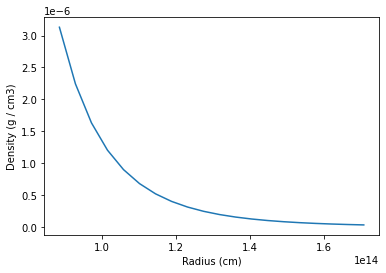

In [4]:
w7_density_config = copy.deepcopy(base_config)

w7_density_config.supernova.time_explosion = 10 * u.day

# This line is necessary to indicate we are using a built-in shell structure
# and density. Do not change it.
w7_density_config.model.structure.type = 'specific'

w7_density_config.model.structure.velocity.start = 1000 * u.km/u.s
w7_density_config.model.structure.velocity.stop = 2000 * u.km/u.s
w7_density_config.model.structure.velocity.num = 20

w7_density_config.model.structure.density.type = 'branch85_w7'

w7_density_model = Radial1DModel.from_config(w7_density_config)

print('density:\n', w7_density_model.density)

plt.plot(w7_density_model.r_middle, w7_density_model.density)
plt.xlabel(f'Radius ({w7_density_model.r_middle.unit})')
plt.ylabel(f'Density ({w7_density_model.density.unit})');

density:
 [1.81157579e-06 1.29796899e-06 9.44182418e-07 6.96399579e-07
 5.20200716e-07 3.93144562e-07 3.00339476e-07 2.31741962e-07
 1.80476024e-07 1.41768395e-07 1.12262487e-07 8.95693988e-08
 7.19697525e-08 5.82129873e-08 4.73805252e-08 3.87913652e-08
 3.19362180e-08 2.64310649e-08 2.19840868e-08 1.83718913e-08] g / cm3


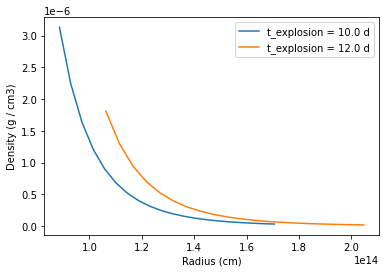

In [5]:
w7_modified_config = copy.deepcopy(w7_density_config)

w7_modified_config.supernova.time_explosion = 12 * u.day

w7_modified_model = Radial1DModel.from_config(w7_modified_config)

print('density:\n', w7_modified_model.density)

plt.plot(w7_density_model.r_middle,
         w7_density_model.density,
         label=f't_explosion = {w7_density_config.supernova.time_explosion}')
plt.plot(w7_modified_model.r_middle,
         w7_modified_model.density,
         label=f't_explosion = {w7_modified_config.supernova.time_explosion}')
plt.xlabel(f'Radius ({w7_density_model.r_middle.unit})')
plt.ylabel(f'Density ({w7_density_model.density.unit})')
plt.legend();

### Uniform Density

density:
 [5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10
 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10] g / cm3


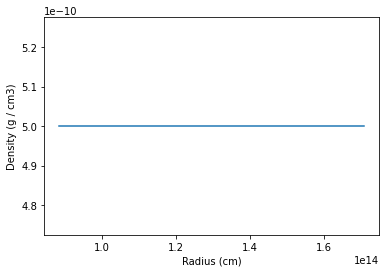

In [6]:
uni_density_config = copy.deepcopy(base_config)

uni_density_config.supernova.time_explosion = 10 * u.day

# This line is necessary to indicate we are using a built-in shell structure
# and density. Do not change it.
uni_density_config.model.structure.type = 'specific'

uni_density_config.model.structure.velocity.start = 1000 * u.km/u.s
uni_density_config.model.structure.velocity.stop = 2000 * u.km/u.s
uni_density_config.model.structure.velocity.num = 20

uni_density_config.model.structure.density.type = 'uniform'
uni_density_config.model.structure.density.time_0 = 1 * u.day
uni_density_config.model.structure.density.value = 5e-10 * u.kg/u.cm**3

uni_density_model = Radial1DModel.from_config(uni_density_config)

print('density:\n', uni_density_model.density)

plt.plot(uni_density_model.r_middle, uni_density_model.density)
plt.xlabel(f'Radius ({uni_density_model.r_middle.unit})')
plt.ylabel(f'Density ({uni_density_model.density.unit})');

### Power Law Density

density:
 [8.83050313e-09 1.06837531e-08 1.28144531e-08 1.52490031e-08
 1.80150031e-08 2.11412531e-08 2.46577531e-08 2.85957031e-08
 3.29875031e-08 3.78667531e-08 4.32682531e-08 4.92280031e-08
 5.57832031e-08 6.29722531e-08 7.08347531e-08 7.94115031e-08
 8.87445031e-08 9.88769531e-08 1.09853253e-07 1.21719003e-07] g / cm3


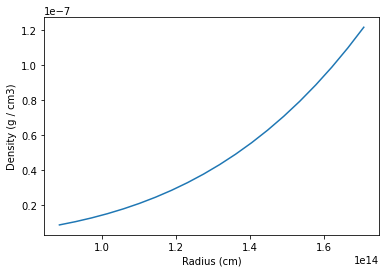

In [7]:
pow_density_config = copy.deepcopy(base_config)

pow_density_config.supernova.time_explosion = 10 * u.day

# This line is necessary to indicate we are using a built-in shell structure
# and density.
pow_density_config.model.structure.type = 'specific'

pow_density_config.model.structure.velocity.start = 1000 * u.km/u.s
pow_density_config.model.structure.velocity.stop = 2000 * u.km/u.s
pow_density_config.model.structure.velocity.num = 20

pow_density_config.model.structure.density.type = 'power_law'
pow_density_config.model.structure.density.time_0 = 1 * u.day
pow_density_config.model.structure.density.rho_0 = 5e-10 * u.kg/u.cm**3
pow_density_config.model.structure.density.v_0 = 500 * u.km/u.s
pow_density_config.model.structure.density.exponent = 4

pow_density_model = Radial1DModel.from_config(pow_density_config)

print('density:\n', pow_density_model.density)

plt.plot(pow_density_model.r_middle, pow_density_model.density)
plt.xlabel(f'Radius ({pow_density_model.r_middle.unit})')
plt.ylabel(f'Density ({pow_density_model.density.unit})');

### Exponential Denity

density:
 [6.43674518e-11 5.82420789e-11 5.26996123e-11 4.76845811e-11
 4.31467932e-11 3.90408330e-11 3.53256065e-11 3.19639306e-11
 2.89221604e-11 2.61698530e-11 2.36794622e-11 2.14260634e-11
 1.93871039e-11 1.75421771e-11 1.58728182e-11 1.43623198e-11
 1.29955644e-11 1.17588729e-11 1.06398682e-11 9.62735089e-12] g / cm3


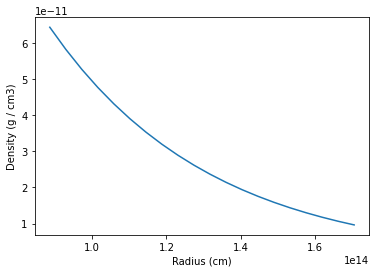

In [8]:
exp_density_config = copy.deepcopy(base_config)

exp_density_config.supernova.time_explosion = 10 * u.day

# This line is necessary to indicate we are using a built-in shell structure
# and density.
exp_density_config.model.structure.type = 'specific'

exp_density_config.model.structure.velocity.start = 1000 * u.km/u.s
exp_density_config.model.structure.velocity.stop = 2000 * u.km/u.s
exp_density_config.model.structure.velocity.num = 20

exp_density_config.model.structure.density.type = 'exponential'
exp_density_config.model.structure.density.time_0 = 1 * u.day
exp_density_config.model.structure.density.rho_0 = 5e-10 * u.kg/u.cm**3
exp_density_config.model.structure.density.v_0 = 500 * u.km/u.s

exp_density_model = Radial1DModel.from_config(exp_density_config)

print('density:\n', exp_density_model.density)

plt.plot(exp_density_model.r_middle, exp_density_model.density)
plt.xlabel(f'Radius ({exp_density_model.r_middle.unit})')
plt.ylabel(f'Density ({exp_density_model.density.unit})');

## Abundance

**talk about file abundance and csvy**

In [9]:
abund_config = copy.deepcopy(base_config)

abund_config.supernova.time_explosion = 10 * u.day

# We add the abundances in this form to overwrite the elements in the
# base configuration.
abund_config.model.abundances = {'type':'uniform',
                                            'O':.2,
                                            'Ca':.25,
                                            'Mg':.15,
                                            'Si':.3,
                                            'He': .1}

abund_model = Radial1DModel.from_config(abund_config)

abund_model.abundance

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
atomic_number,,,,,,,,,,,,,,,,,,,,
2,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
8,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20
12,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
14,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30
20,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


talk abt isotopes

In [10]:
abund_isotopes_config = copy.deepcopy(base_config)

abund_isotopes_config.supernova.time_explosion = 10 * u.day

abund_isotopes_config.model.structure.velocity.num = 20

abund_isotopes_config.model.abundances = {'type':'uniform',
                                            'O':.3,
                                            'Ni56':.2,
                                            'Ni57':.1,
                                            'Cr51':.4}

abund_isotopes_model = Radial1DModel.from_config(abund_isotopes_config)

abund_isotopes_model.abundance

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
atomic_number,,,,,,,,,,,,,,,,,,,,
8,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004,0.300004
23,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549,0.088549
24,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455
26,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001,0.009001
27,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154,0.226154
28,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836,0.064836


## Radiative Temperature

Insert explanation here

This uses the innter temperature, i.e. the temperature of the photosphere. This is calculated as
eqn
where $L$ is blah. The rationale for this equation will be explained in [Energy Packet Initialization](../montecarlo/initialization.ipynb). **is this how I want to do this?**

**Note about how t_inner or t_rad can be input (in plasma or t_rad in csvy). Note about how t_rad and t_inner change throughout sim (talk abt if you don't want it to change?).**

<div class="alert alert-info">
    
Note

The indivisible energy packet scheme does not require that all packets have the same energy. This is just a convenient and simple choice adopted in TARDIS.

</div>

<div class="alert alert-info">
    
Note

The indivisible energy packet scheme does not require that all packets have the same energy. This is just a convenient and simple choice adopted in TARDIS.

</div>

t_inner:
 93122.09836905584 K
t_rad:
 [93114.33346946 93098.80755443 93083.28681612 93067.77125196
 93052.26085936 93036.75563572 93021.25557846 93005.76068501
 92990.27095279 92974.78637921 92959.30696169 92943.83269767
 92928.36358457 92912.89961982 92897.44080085 92881.98712509
 92866.53858997 92851.09519294 92835.65693142 92820.22380286] K


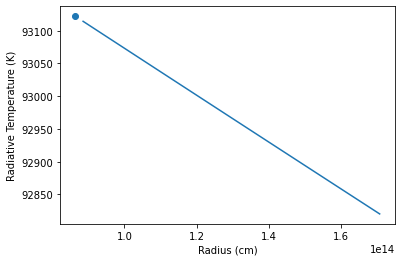

In [14]:
t_rad_config = copy.deepcopy(base_config)

t_rad_config.supernova.time_explosion = 10 * u.day

# In the configuration file, but not here, the luminosity requested can be
# given on a logarithmic scale based on the luminosity of the sun.
t_rad_config.supernova.luminosity_requested = 4e44 * u.erg/u.s

# This line is necessary to indicate we are using a built-in shell structure
# and density. Do not change it.
t_rad_config.model.structure.type = 'specific'

t_rad_config.model.structure.velocity.start = 1000 * u.km/u.s
t_rad_config.model.structure.velocity.stop = 2000 * u.km/u.s
t_rad_config.model.structure.velocity.num = 20

t_rad_model = Radial1DModel.from_config(t_rad_config)

print('t_inner:\n', t_rad_model.t_inner)
print('t_rad:\n', t_rad_model.t_rad)

plt.plot(t_rad_model.r_middle, t_rad_model.t_rad)
plt.scatter(t_rad_model.radius[0], t_rad_model.t_inner)
plt.xlabel(f'Radius ({t_rad_model.r_middle.unit})')
plt.ylabel(f'Radiative Temperature ({t_rad_model.t_rad.unit})');
######################add legend???????????????

## Dilution Factor

**Note about how w can be input (in csvy). Note about how w throughout sim (talk abt if you don't want it to change?).**

<div class="alert alert-info">
    
Note

The indivisible energy packet scheme does not require that all packets have the same energy. This is just a convenient and simple choice adopted in TARDIS.

</div>

<div class="alert alert-info">
    
Note

The indivisible energy packet scheme does not require that all packets have the same energy. This is just a convenient and simple choice adopted in TARDIS.

</div>

w:
 [0.3902439  0.31651472 0.27093858 0.23746888 0.21120466 0.1898178
 0.17197474 0.15682571 0.14379052 0.13245342 0.12250561 0.11371132
 0.10588651 0.09888494 0.09258861 0.08690114 0.08174289 0.07704742
 0.07275885 0.06882984]


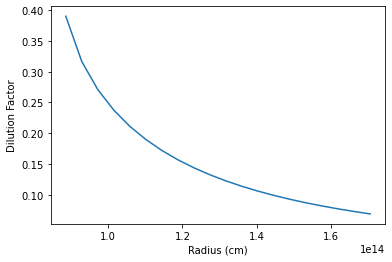

In [12]:
w_config = copy.deepcopy(base_config)

w_config.supernova.time_explosion = 10 * u.day

# This line is necessary to indicate we are using a built-in shell structure
# and density. Do not change it.
w_config.model.structure.type = 'specific'

w_config.model.structure.velocity.start = 1000 * u.km/u.s
w_config.model.structure.velocity.stop = 2000 * u.km/u.s
w_config.model.structure.velocity.num = 20

w_model = Radial1DModel.from_config(w_config)

print('w:\n', w_model.w)

plt.plot(w_model.r_middle, w_model.w)
plt.xlabel(f'Radius ({w_model.r_middle.unit})')
plt.ylabel(f'Dilution Factor');

In [13]:
print(t_rad_model.t_rad == t_rad_model.t_radiative)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
